In [ ]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

--2023-08-23 14:46:28--  https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.2.33, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70702765 (67M) [application/zip]
Saving to: ‘cats_and_dogs.zip.4’

cats_and_dogs.zip.4 100%[===================>]  67.43M   153MB/s    in 0.4s    

2023-08-23 14:46:28 (153 MB/s) - ‘cats_and_dogs.zip.4’ saved [70702765/70702765]

Archive:  cats_and_dogs.zip
replace cats_and_dogs/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# Define image preprocessing parameters
rescale_factor = 1.0 / 255.0

# Create image data generators for train, validation, and test sets
train_image_generator = ImageDataGenerator(rescale=rescale_factor)
validation_image_generator = ImageDataGenerator(rescale=rescale_factor)
test_image_generator = ImageDataGenerator(rescale=rescale_factor)


# Create image generators for train, validation, and test sets
train_data_gen = train_image_generator.flow_from_directory(
    directory = train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    color_mode="rgb",
    batch_size=batch_size,
    shuffle=True,
    seed = 42,
    class_mode='binary'  # Change to 'binary' or None if appropriate
)

validation_data_gen = validation_image_generator.flow_from_directory(
    directory = validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    color_mode="rgb",
    batch_size=batch_size,
    shuffle=True,
    seed = 42,
    class_mode='binary'
)

test_data_gen = test_image_generator.flow_from_directory(
                                            directory = PATH,
                                            target_size=(IMG_HEIGHT, IMG_WIDTH),
                                            color_mode="rgb",
                                            batch_size=batch_size,
                                            classes = ['test'],
                                            shuffle=False,
                                            seed=42
                                        )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


#Plotting the Images

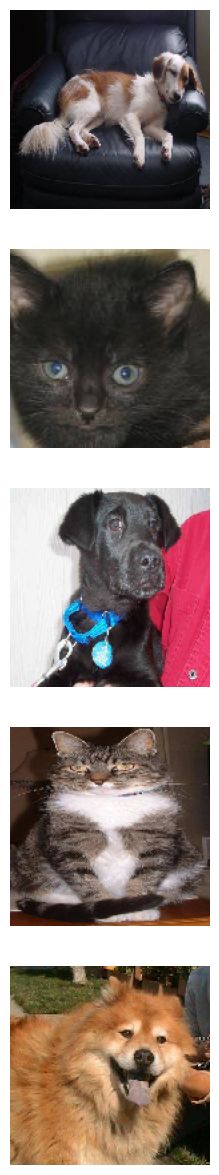

In [ ]:
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

random_sample_training_images, _ = next(train_data_gen)
plotImages(random_sample_training_images[:5])

#Recreating the train_image_generator using ImageDataGenerator

In [ ]:
train_image_generator = ImageDataGenerator(
    samplewise_center=False,
    width_shift_range=0.5,
    height_shift_range=0.5,
    shear_range=0.1,
    zoom_range=0.1,
    channel_shift_range=0.1,
    fill_mode='nearest',
    horizontal_flip=False,
    vertical_flip=False,
    rescale=1./255,
    preprocessing_function=None,
)

train_data_gen is created just like before but with the new train_image_generator. Then, a single image is plotted five different times using different variations.

Found 2000 images belonging to 2 classes.


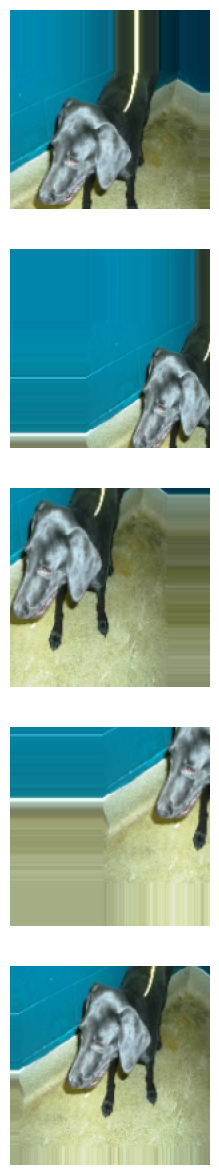

In [ ]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

creating a model for the neural network that outputs class probabilities. Using the Keras Sequential model. Involving a stack of Conv2D and MaxPooling2D layers and then a fully connected layer on top that is activated by a ReLU activation function.

In [ ]:
from keras.layers import BatchNormalization, LeakyReLU

input_shape = (IMG_HEIGHT, IMG_WIDTH, 3)
kernel_size = 3
pool_size = 2
filters = 16
dropout = 0.5
num_labels = 2

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=kernel_size, activation='linear', input_shape=input_shape))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size))

model.add(Conv2D(filters=64, kernel_size=kernel_size, activation='linear'))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size))

model.add(Conv2D(filters=128, kernel_size=kernel_size, activation='linear'))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size))

model.add(Conv2D(filters=256, kernel_size=kernel_size, activation='linear'))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size))

model.add(Dropout(dropout))
model.add(Flatten())

model.add(Dense(512, activation='linear'))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))

model.add(Dense(128, activation='linear'))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))

model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_84 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 batch_normalization_24 (Bat  (None, 148, 148, 32)     128       
 chNormalization)                                                
                                                                 
 leaky_re_lu_24 (LeakyReLU)  (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_84 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_85 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_25 (Bat  (None, 72, 72, 64)     

Compiling the model passing the arguments to set the optimizer and loss.
Also using  metrics=['accuracy'] to view training and validation accuracy for each training epoch.

In [ ]:
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy


model.compile(optimizer=Adam(learning_rate=0.01),
              loss=BinaryCrossentropy(),
              metrics=['accuracy'])

Using the fit method on our model to train the network.

#Training the Model

In [ ]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

history = model.fit(train_data_gen,
                    epochs=epochs,
                    steps_per_epoch=3,
                    batch_size=batch_size,
                    validation_data=validation_data_gen,
                    validation_steps=3,
                    )

Epoch 1/15
3/3 [==============================] - 26s 9s/step - loss: 1.0225 - accuracy: 0.4688 - val_loss: 13.0630 - val_accuracy: 0.4714
Epoch 2/15
3/3 [==============================] - 25s 9s/step - loss: 0.7005 - accuracy: 0.5104 - val_loss: 138.7631 - val_accuracy: 0.5156
Epoch 3/15
3/3 [==============================] - 31s 12s/step - loss: 0.7120 - accuracy: 0.5234 - val_loss: 116.8290 - val_accuracy: 0.5026
Epoch 4/15
3/3 [==============================] - 30s 11s/step - loss: 0.6884 - accuracy: 0.5885 - val_loss: 14.2390 - val_accuracy: 0.5208
Epoch 5/15
3/3 [==============================] - 28s 10s/step - loss: 0.7168 - accuracy: 0.5476 - val_loss: 276.3977 - val_accuracy: 0.4635
Epoch 6/15
3/3 [==============================] - 30s 11s/step - loss: 0.6572 - accuracy: 0.6068 - val_loss: 295.5239 - val_accuracy: 0.5104
Epoch 7/15
3/3 [==============================] - 30s 11s/step - loss: 0.6762 - accuracy: 0.5833 - val_loss: 184.3547 - val_accuracy: 0.5130
Epoch 8/15
3/3 [=

#Visualization of the accuracy and loss of the model on the graphs.

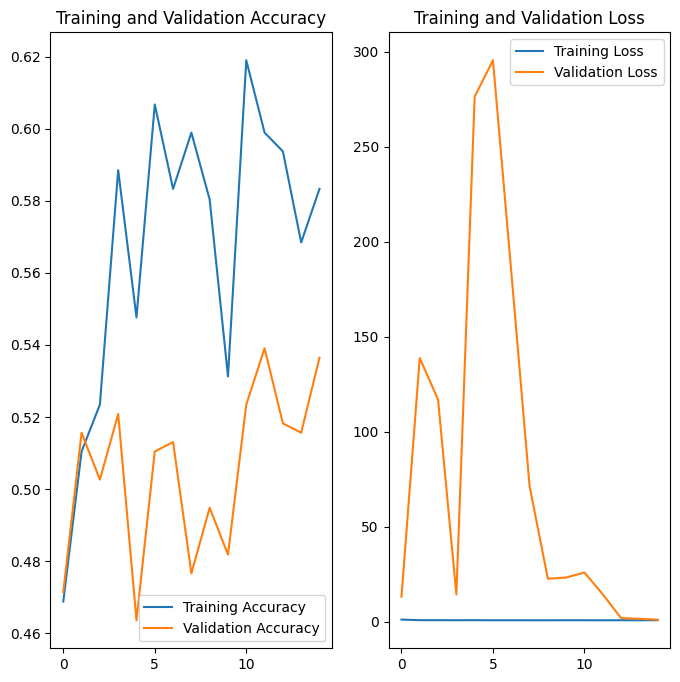

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#Prediction


1/1 [==============================] - 1s 821ms/step


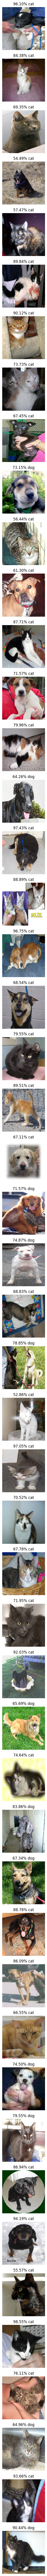

In [ ]:
probabilities = model.predict(test_data_gen)
probabilities = probabilities.reshape(-1)
probabilities = probabilities.tolist()

random_sample_training_images, _ = next(test_data_gen)
plotImages(random_sample_training_images, probabilities = probabilities)

In [ ]:
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 64.0% of the images of cats and dogs.
You passed the challenge!
